# PHYS 210, Homework 05
Due Monday, Sep 22, 2025 at the start of class on Canvas

## *About this homework assignment*

This homework assignment is designed to get everybody started on their Project 01. It is considered Stage 1 of a 3-stage process in developing your project, as described in the [Project 01 - Destructive Collisions: Instructions & Assessment Guidelines](https://physics210.github.io/p210-2025/Project01-instructions_and_assessment.html) document.

### Task 1: Fix the starter code
Update the starter code in the "Your Task 1 and Task 2 code" cell below so that the collision between the two objects is handled correctly.

### Task 2: Add plots
Add one or more well-captioned and well-labeled plots (not animations) that show the kinematic behaviour of the two objects. 

It’s up to you exactly what you plot, but the idea is that these plots provide you (and the reader) with insight into the behaviour of these objects within the simulation. These types of plots can also be extremely valuable in troubleshooting your code, or otherwise validating that your simulation is behaving as intended.

### Task 3: Test that your code handles a range of initial conditions and parameters well
Copy your working code into the Task 3 cells below.

Try at least two different sets of initial conditions that you feel could result in unexpected behaviour in your simulation. Examples include making values–such as the initial kinematic quantities or physical properties—significantly smaller or larger than the ones provided. In each case describe which values you changed, why you thought these values might result in unexpected behaviour, and if they did actually result in any unexpected behaviour. If the unexpected behaviour is something that should be fixed, try your best to fix it.

## *Your Task 1 and Task 2 code*

Modify the code below as much as needed to accomplish each task. There is a backup copy of the code at the bottom of the document for reference. Add additional cells to this section as needed

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dataclasses import dataclass

In [5]:
@dataclass
class RigidBody:
    initial_position: float
    initial_velocity: float
    initial_acceleration: float
    mass: float
    color: str
    name: str
    
    time:         np.array = None
    position:     np.array = None
    velocity:     np.array = None
    acceleration: np.array = None
    energy:       np.array = None
    momentum:     np.array = None
    
    def init(self, n):
        self.position     = np.zeros(n)
        self.velocity     = np.zeros(n)
        self.acceleration = np.zeros(n)
        self.energy       = np.zeros(n)
        self.momentum     = np.zeros(n)
        
        self.position[0]     = self.initial_position
        self.velocity[0]     = self.initial_velocity
        self.acceleration[0] = self.initial_acceleration
        
    def distance_to(self, other_body, i):
        return np.sqrt(np.sum((self.position[i] - other_body.position[i])**2))

    def collided_with(self, other_body, collision_radius, i):
        return self.distance_to(other_body, i) <= collision_radius
    
    def near_barrier(self, bottom_barrier, top_barrier, collision_radius, i):
        return \
            abs(self.position[i] - bottom_barrier) <= collision_radius or \
            abs(self.position[i] - top_barrier) <= collision_radius

In [8]:
def simulate(objects, time_range, dt, collision_radius=0.1, 
             bottom_barrier=-10, top_barrier=10):
    time = np.arange(time_range[0], time_range[1], dt)
    total_frames = np.size(time)
    
    for body in objects:
        body.init(total_frames)
    
    for i in range(1,total_frames):
        # update positions
        for body in objects:
            body.position[i] = body.position[i-1] + body.velocity[i-1] * dt
            body.velocity[i] = body.velocity[i-1] + body.acceleration[i-1] * dt
        
        # detect collisions
        to_invert = set()
        
        for i, body in enumerate(objects):
            for other_body in objects[i+1:]:
                if body.collided_with(other_body, collision_radius, i):
                    to_invert.add(body)
                    to_invert.add(other)
                    
        for body in objects:
            if body.near_barrier(bottom_barrier, top_barrier, collision_radius, i):
                to_invert.add(body)
        
        for body in to_invert:
            body.velocity[i] *= -1
            
        if len(to_invert) != 0:
            print(i, [b.name for b in to_invert])
            
    # ending calculations
    for body in objects:
        body.momentum = body.mass * body.velocity
        body.energy = (1/2) * body.mass * body.velocity ** 2
        
    return time

In [9]:
object_1 = RigidBody(
    initial_position = -5,
    initial_velocity =  2,
    initial_acceleration = 0,
    mass = 0.01,
    color = 'lightblue',
    name = 'Object 1'
)

object_2 = RigidBody(
    initial_position =  7,
    initial_velocity = -1,
    initial_acceleration = 0,
    mass = 0.001,
    color = 'orange',
    name = 'Object 2'
)

objects = [object_1, object_2]
time = simulate(objects, time_range=(0, 100), dt=0.01)

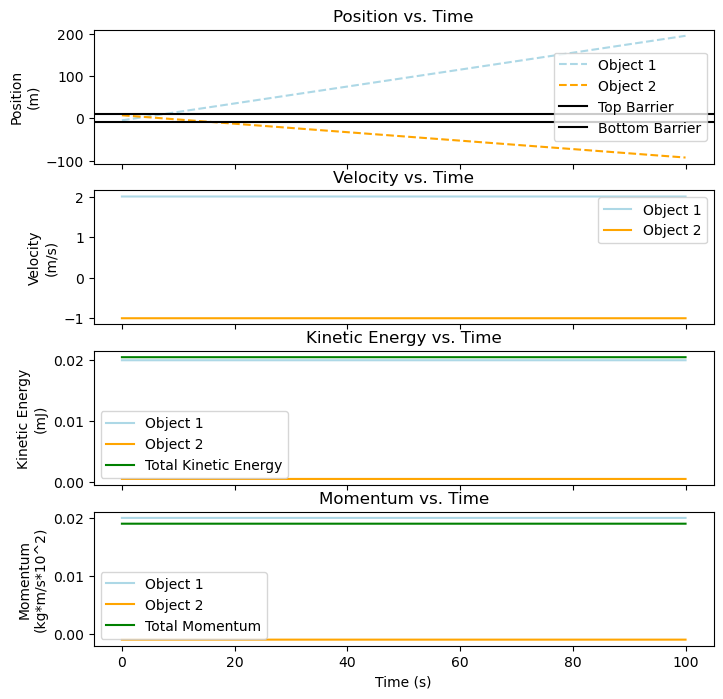

In [10]:
fig, axs = plt.subplots(4,1, sharex=True, figsize=(8,8))

# position
for body in objects:
    axs[0].plot(time, body.position, 
                color=body.color, 
                label=body.name,
                linestyle='dashed')
axs[0].axhline(y=10, color='black', label='Top Barrier')
axs[0].axhline(y=-10, color='black', label='Bottom Barrier')
axs[0].set_ylabel('Position\n(m)')
axs[0].set_title('Position vs. Time')
axs[0].legend()

# velocity
for body in objects:
    axs[1].plot(time, body.velocity, 
                color=body.color, 
                label=body.name)
axs[1].set_ylabel('Velocity\n(m/s)')
axs[1].set_title('Velocity vs. Time')
axs[1].legend()

# kinetic energy
total_energy = np.zeros_like(time)
for body in objects:
    axs[2].plot(time, body.energy, 
                color=body.color, 
                label=body.name)
    total_energy = total_energy + body.energy
axs[2].plot(time, total_energy, color='green', label='Total Kinetic Energy')
axs[2].set_ylabel('Kinetic Energy\n(mJ)')
axs[2].set_title('Kinetic Energy vs. Time')
axs[2].legend()

# momentum
total_momentum = np.zeros_like(time)
for body in objects:
    axs[3].plot(time, body.momentum, 
                color=body.color, 
                label=body.name)
    total_momentum = total_momentum + body.momentum
axs[3].plot(time, total_momentum, color='green', label='Total Momentum')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Momentum\n(kg*m/s*10^2)')
axs[3].set_title('Momentum vs. Time')
axs[3].legend()

plt.show()

In [ ]:
print(object_1.position)

## *Your Task 3 code*


### Your first set of new initial conditions

In [ ]:
# Copy your Task 1+2 code into this cell and modify it with new initial conditions
# and any necessary diagnostic output. Insert additional cells as needed. 


#### Describe which values you changed, why you thought these values might result in unexpected behaviour, and if they did actually result in any unexpected behaviour.

### Your second set of new initial conditions

In [ ]:
# Copy your Task 1+2 code into this cell and modify it with new initial conditions
# and any necessary diagnostic output. Insert additional cells as needed. 


#### Describe which values you changed, why you thought these values might result in unexpected behaviour, and if they did actually result in any unexpected behaviour.

## *Completing Homework 05 and submitting it to Canvas*
Before submitting your work, restart + rerun your entire notebook to make sure that everything runs correctly and without error.

To do this:
1. **Restart & Run All:** From the "Kernel" menu to the right of the "Cell" menu, select "Restart & Run All". This will restart the python Kernel, erasing all variables currently stored in memory so that when you "Run All" cells, you can ensure that if you were to run your notebook again on a later day, it would run as intended.
1. Look through the whole notebook and make sure there are no errors. Many questions have purposeful errors in the distributed version so make sure you have fixed them all such that "Restart & Run All" will run through the whole book and successfully print "The notebook ran without errors" at the end. If you have any trouble resolving the errors, please ask one of your classmates or ask us in class or on Piazza.

**Export notebook as HTML:** After you've executed and checked your notebook, choose: File => Save_and_Export_Notebook_As => HTML. This will download an HTML version of your notebook to your computer. This version is can not be executed or modified. You may need to disable any pop-up blockers to allow the file to be downloaded.

**Submit to Canvas:** Submit the html file that you just downloaded AND your .ipynb file to the Homework 05 submission quiz on Canvas.

## *Backup copy of the starter code for Project 01*
```python
### Starter code for Project 01

import numpy as np

# Constants
t0 = 0      # s
dt = 0.1    # s
t_max = 100 # s
n_steps = int( (t_max - t0) / dt) + 1 # Total number of steps
left_barrier = -10 # m
right_barrier = 10 # m

# Arrays to save simulation information
t = np.zeros(n_steps)
x1 = np.zeros(n_steps)
x2 = np.zeros(n_steps)
v1 = np.zeros(n_steps)
v2 = np.zeros(n_steps)

# Object 1
x1_initial = -5 # m
v1_initial = 2  # m/s
r1 = 0.05 # m
m1 = .01 # kg
x1[0] = x1_initial 
v1[0] = v1_initial 

# Object 2
x2_initial = 7  # m
v2_initial = -1 # m /s
r2 = 0.02 # m
m2 = .001 # kg
x2[0] = x2_initial 
v2[0] = v2_initial 


for i in range(1,n_steps):
    
    # Update kinematic variable for both objects
    x1[i] = x1[i-1] + v1[i-1] * dt
    x2[i] = x2[i-1] + v2[i-1] * dt
    v1[i] = v1[i-1]
    v2[i] = v2[i-1]
    t[i]  =  t[i-1] + dt

    # Check for collisions and update kinematic quantities as needed
    if x1[i] + r1 >= right_barrier or x1[i] - r1 <= left_barrier:
        v1[i] = -v1[i]

    if x2[i] + r2 >= right_barrier or x2[i] - r2 <= left_barrier:
        v2[i] = -v2[i]
```